## Projeto Predição de Insuficiência Cardiaca

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Informações de atributo
- Idade: idade do paciente [anos]
- Sexo: sexo do paciente [M: Masculino, F: Feminino]
- ChestPainType: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- PA de repouso: pressão arterial de repouso [mm Hg]
- Colesterol: colesterol sérico [mm/dl]
- FastingBS: glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- ECG de repouso: resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- MaxHR: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- ExercícioAngina: angina induzida por exercício [S: Sim, N: Não]
- Pico antigo: pico antigo = ST [Valor numérico medido em depressão]
- ST_Slope: a inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: classe de saída [1: doença cardíaca, 0: normal]

# Extração

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

heart_df = pd.read_csv('./dataset/heart.csv', sep=',')
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [2]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequência Cardiaca Max', 
    'ExerciseAngina': 'Exercício_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doença_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequência Cardiaca Max,Exercício_Angina,Pico_Antigo,ST_Slope,Doença_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploração

In [3]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Colunas: 12
Linhas: 918


In [4]:
heart_df.describe()

,Idade,RepousoPA,Colesterol,FastingBS,Frequência Cardiaca Max,Pico_Antigo,Doença_Cardiaca
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    918 non-null    int64  
 1   Sexo                     918 non-null    object 
 2   Tipo_Dor_Peito           918 non-null    object 
 3   RepousoPA                918 non-null    int64  
 4   Colesterol               918 non-null    int64  
 5   FastingBS                918 non-null    int64  
 6   RestingECG               918 non-null    object 
 7   Frequência Cardiaca Max  918 non-null    int64  
 8   Exercício_Angina         918 non-null    object 
 9   Pico_Antigo              918 non-null    float64
 10  ST_Slope                 918 non-null    object 
 11  Doença_Cardiaca          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Calculando a quantidade de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

In [6]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doença_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doença_Cardiaca == 0').shape[0])

paciente com Insuficiência Cardiacas: 508
paciente sem Insuficiência Cardiaca: 410


# Limpeza

Percebemos que não ha valores NaN em nosso DataSet. Como existem valores erroneos, podemos passar para o proximo passo da AED.

In [7]:
heart_df.notna().value_counts()

Idade  Sexo  Tipo_Dor_Peito  RepousoPA  Colesterol  FastingBS  RestingECG  Frequência Cardiaca Max  Exercício_Angina  Pico_Antigo  ST_Slope  Doença_Cardiaca
True   True  True            True       True        True       True        True                     True              True         True      True               918
dtype: int64

# Discretização

Formar conjuntos de idade para classificação

In [8]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

Idade maxima:  77
Idade MINIMA:  28


In [9]:
bins = [0,12,20,60,100]
conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins)

In [10]:
heart_df['conjunto_idade'] = conjuto_idade

In [11]:
heart_df['conjunto_idade'].value_counts()

(20, 60]     697
(60, 100]    221
(0, 12]        0
(12, 20]       0
Name: conjunto_idade, dtype: int64

In [12]:
heart_df

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequência Cardiaca Max,Exercício_Angina,Pico_Antigo,ST_Slope,Doença_Cardiaca,conjunto_idade
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(20, 60]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(20, 60]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(20, 60]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(20, 60]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(20, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,"(20, 60]"
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,"(60, 100]"
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,"(20, 60]"
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,"(20, 60]"


# Quais atributos tem relação?

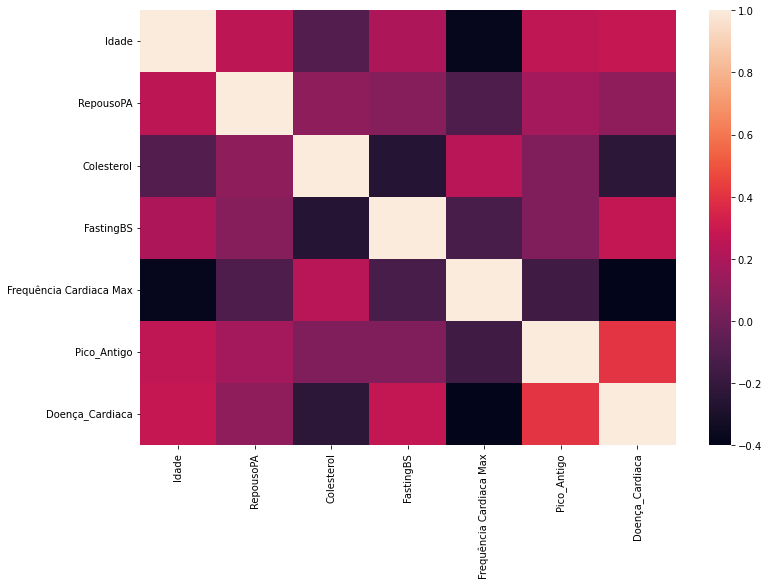

In [25]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(heart_df.corr())
plt.show()